## <font color='blue'> 1. Modelo y simulación del crecimiento de colesterol en el cuerpo</font>


Eres parte de un equipo encargado de analizar el comportamiento del colesterol. En tu equipo se encuentra un nutricionista que no  informa sobre los niveles de colesterol en la sangre, basado en el hecho de que el colesterol es fabricado por el cuerpo para usarse en la construcción de paredes celulares y es absorbido de alimentos que lo contienen. Identificas como variable $C_{(t)}$ la cantidad de colesterol en la sangre de una persona particular en el tiempo $t$ (en miligramos por decilitro). Además identificas los parámetros $C_N$ como el nivel natural de colesterol en la persona, $k_1$ el parámetro de producción, $E$ la razón diaria a la que se ingiere colesterol, y $k_2$ parámetro de absorción. el nutricionista, a aprtir de la observación conjetura y nos indica que la velocidad de crecimiento del colesterol es igual a la diferencia del colesterol natural y el colesterol en un momento dado, multiplicado por el parametro de producción, mas la razón diaria a la que se ingiere el colesterol por el parámetro de absorción. 

Para un experimento, se tiene que $C_N = 200$, $k_1= 0.1$, $k_2 = 0.1$, $E = 400$ y $C_{(0)} = 150$. 

a) ¿Cuál será el nivel de colesterol de la persona después de 2 días con esta dieta?

b) Con las condiciones iniciales anteriores, ¿cuál será el nivel de colesterol en la per­
sona después de 5 días con esta dieta?

c) ¿Cuál será el nivel de colesterol en la persona después de un tiempo muy largo
con esta dieta?

d) Se sabe que los niveles muy altos de colesterol en la sangre son un factor de riesgo para las enfermedades del corazón. Suponga que, después de un tiempo largo con la dieta alta en dicho esteroide descrita antes, la persona recibe una dieta muy baja en colesterol, de manera que $E$ cambia a $E = 100$. (El nivel inicial de colesterol en el tiempo inicial de esta dieta es el resultado obtenido en el inciso (c). ¿Cuál será el nivel de colesterol en la persona después de 1 día, después de 5 días y después de un tiempo muy largo con la nueva dieta?

e) Suponga que la persona se queda con la dieta alta en colesterol, pero toma medicamentos que bloquean parte de la absorción de dicha sustancia ingerida con los alimentos, por lo que $k_2$ cambia a $k_2 = 0.075$. Con el nivel de colesterol del inciso(c), ¿cuál será la proporción del esteroide en la sangre de esta persona después de 1 día, de 5 días y después de un tiempo muy largo?



In [2]:
from MatModels import  *
import matplotlib.pyplot as plt


In [3]:
# formula Cn - Ct * k1+ E*k2


def getColesterol(t,c0,cn,k1,k2,E):
  dcdt = cn - c0 * k1+ E*k2
  return dcdt


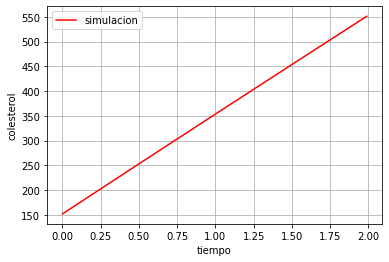

In [4]:
##variables
cn = 200
k1=0.01
k2=0.01
E=400
c0=150
res = get_euler(0,2,c0,getColesterol,0.01,cn,k1,k2,E)


plt.plot(res[1], res[0], c='red', label="simulacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("colesterol")
plt.legend()

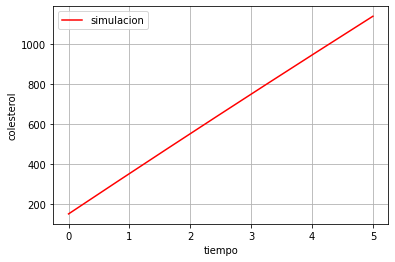

In [5]:
res = get_euler(0,5,c0,getColesterol,0.01,cn,k1,k2,E)


plt.plot(res[1], res[0], c='red', label="simulacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("colesterol")
plt.legend()

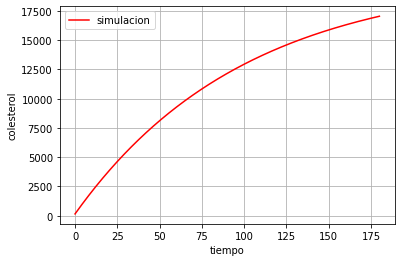

In [6]:
res = get_euler(0,180,c0,getColesterol,0.01,cn,k1,k2,E)


plt.plot(res[1], res[0], c='red', label="simulacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("colesterol")
plt.legend()

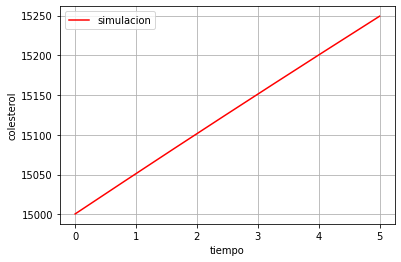

In [7]:
res = get_euler(0,5,15000,getColesterol,0.01,cn,k1,k2,100)


plt.plot(res[1], res[0], c='red', label="simulacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("colesterol")
plt.legend()

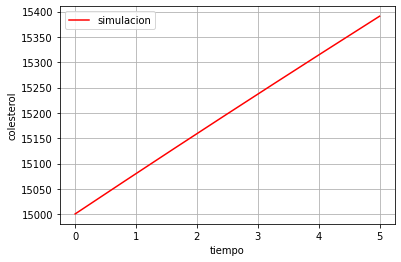

In [8]:
res = get_euler(0,5,15000,getColesterol,0.01,cn,k1,0.075,E)


plt.plot(res[1], res[0], c='red', label="simulacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("colesterol")
plt.legend()

# <font color='blue'>2. Modelo de propagación de publicidad</font>

Una empresa tiene un nuevo producto de cereales y se introduce al mercado a través de unas campañas de publicidad en una población de 1 millón de personas (clientes potenciales). Los expertos en ing.comercial hace el supuesto de que la  velocidad con la que la población objetiva se entera del producto, es proporcional al número de personas que aún no son conscientes del producto. Al  final  de  un  año,  la  mitad  de  la  población  ha  oído  del  producto  en  cuestión.  Te piden un modelo y la simulación para estimar cuantas personas se enterarán del pruducto en un determinado tiempo.

In [9]:
# peopagacion
# N = poblaciob
#n0 personas que no saben del producto 
def propagacion(t, N0, N): 
  dpdt =N0 * N / N - N0
  return dpdt

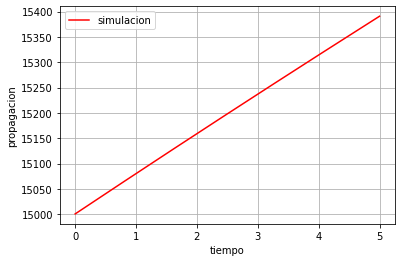

In [10]:
total = get_euler(0,360,500000,propagacion,0.01,1000000)
plt.plot(res[1], res[0], c='red', label="simulacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("propagacion")
plt.legend()

# <font color='blue'>3. Modelo de cambio de temperatura</font>

La carne de cerdo es muy apreciada en Cochabamba, los mas importante es la exigencia de la buena calidad desde el punto de visa de la salud del consumidor, ya que la calidad de la carne depende del buen procesamiento microbiológico de la misma, lo cual indica que un bajo contenido de microorganizmos provoca el deterioro de la carne, lo cual podemos evitar usando adecuadas condiciones de temepratura durante la obtención y le troceado de la carne.

Nos piden modelar y simular el cambio de la temepratura de la carne al transcurrir el tiempo, es decir la variable dependiente es la temperatura $T$. Nos dicen que vamos a suponer que la temperatura ambiente no cambia en la observación. El supuesto que nos manifiestan es que la razón de enfriamiento de la carne es proporcional a la diferencia entre la temperatura en curso y la temperatura ambiente.

En el proceso de la observación de la carne, inicia en el sacrificio del cerdo, momento en le cual su temperatura aproximada en promedio es de 47°C, posteriormente la carne, en contacto con el ambiente (aprox. 2°C), ya que es trasladado a un cuarto frigorifico, donde se procederá a deshuesarlo, es preciso que la temperatura de la carne llegue a 7°C para que la calidad de la carne sea satisfactori. Luego de ello, ya en torzos se espera que llegue a la temperatura de 2°C. Según anteriores mediciones, nos indican que la constante de proporcionalidad del cambio de temperatura es de $k=0.10116$.   

In [22]:
#T EB CURSO = T AMBIENTE
def getTemperatura(t,temp0,k,tempAmbiente):
  dfdt = -k*(temp0-tempAmbiente)
  return dfdt

# para tratar de corregir la temperatura volcanica del chancho
#se intento cambiar el signo de la constante k
# no funciono

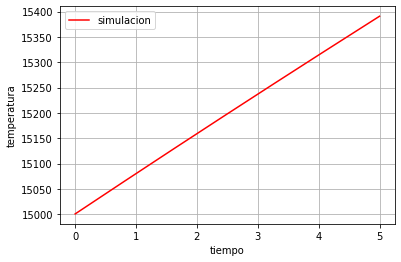

In [23]:
total = get_euler(0,10,47,getTemperatura,0.01,0.10116,2)
plt.plot(res[1], res[0], c='red', label="simulacion")
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("temperatura")
plt.legend()

# <font color='blue'> 4. Modelo Depredador Presa</font>

Se quiere una herramienta para estudiar la familia de un sistema depredador-presa. La familia es:

$$ \displaystyle \left\{
\frac{dx}{dt} = 9x - \alpha x^2 - 3xy \atop
\frac{dy}{dt} = -2y +  xy 
\right.$$

donde $\alpha >= 0$ es un parámetro. En otras palabras, para valores diferentes de $\alpha$ tenemos diferentes sistemas. La variable $x$ es la población de presas (en alguna unidad a escala) y la variable $y$ es la población depredadora. Para un valor dado de $\alpha$ , queremos entender qué sucede en ambas especies cuando $t$ tiende a infinito.

Te piden investigar los retratos fase de esas ecuaciones para varios valores de $\alpha$ en el intervalo $0 <= \alpha <= 5$. Es decir, ensayar $\alpha = 0, 1, 2, 3, 4 y 5$. Piensa qué significa el retrato fase, y población vs tiempo, en términos de la evolución de las poblaciones $x$ y $y$. 

Estudia una cantidad suficiente de valores específicos (5) de las condiciones iniciales con cada $alpha$ para poder analizar todos los diversos escenarios de evolución de la población para esos sistemas.

En su reporte debe describir esos escenarios usando los retratos fase y las gráficas $x(t)$ y $y(t)$. 


In [13]:
def ecosistema(t, ci, a, b, c, d):
  dxdt = 9 * ci[0] - a * ci[0]**2 * 3*ci[0]*ci[1] # ci es un vector
  dydt = -2*ci[1]+ci[0]*ci[1]
  return np.array([dxdt, dydt])

In [14]:
ci = np.array([0.4,0.2]) # 100 y 50
Y, t = getRungeKutta(0,20,ci, ecosistema, 0.01 ,1.2, 0.9, 1,1.1)
 

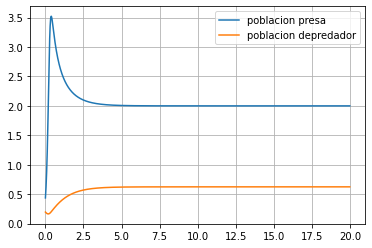

In [15]:
# v = f(t)

plt.plot(t,Y[:,0], label = "poblacion presa")
plt.plot(t,Y[:,1], label = "poblacion depredador")
plt.legend()
plt.grid()

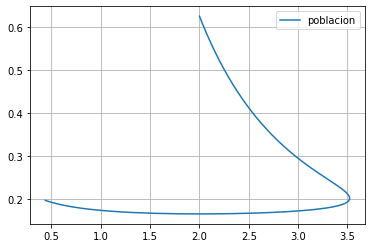

In [16]:
# y = f(t)
plt.plot(Y[:,0],Y[:,1], label = "poblacion")
plt.legend()
plt.grid()

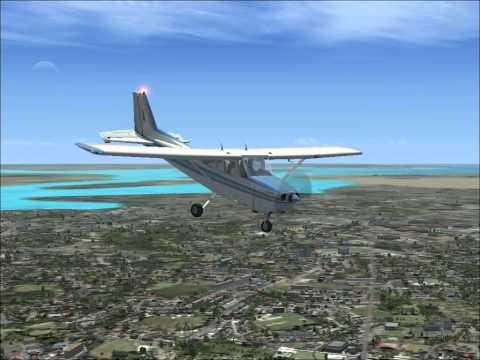

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('ysdU4mnRYdM')

Este movimiento es muy natural, sin embargo puede empeorar mucho cuando un avión entra en modos inestables. Por ejemplo, uno de los prototipos de aeronaves con energía solar "Helios" de la NASA se rompió en el aire debido a las oscilaciones extremas de los fugos.

Helios fue una prueba de concepto de ala voladora propulsada por electricidad solar que rompió el récord mundial de altitud para un avión sin cohetes en agosto de 2001. Pero el 26 de junio de 2003, la aeronave entró en movimiento oscilatorio después de encontrar turbulencias cerca de la isla hawaiana de Kauai. La alta velocidad en el movimiento oscilatorio excedió los límites de diseño y terminó naufragado en el Océano Pacífico.

Afortunadamente, el Helios fue operado de forma remota y nadie resultó herido.

La oscilación hace que el avión se lance hacia arriba y hacia abajo, a medida que desacelera y acelera. La trayectoria podría verse como una sinusoide. La suposición es que la velocidad de avance del avión, $v$, varía de tal manera que el ángulo de ataque permanece (casi) constante, lo que significa que podemos asumir un coeficiente de sustentación constante.

$$
\begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix} \nonumber
\end{align}
$$



In [19]:
import math
# Establecer parámetros.
g = 9.81 # aceleración gravitatoria (m.s^{-2})
vt = 30,0 # velocidad de ajuste (m.s)
CD = 1.0 / 40 # coeficiente de arrastre
CL = 1.0 # coeficiente de sustentación
dt=0.01
# Establecer condiciones iniciales.
v0 = vt # inicio en la velocidad de ajuste
theta0 = 0.0 # ángulo de trayectoria
x0 = 0.0 # posición horizontal
y0 = 1000.0 # posición vertical (altitud)





In [20]:


def simulacionAvion(t0,ci,theta0,v0):
    dvdt = -g*math.sin(theta0)
    theta0 = theta0+v0*dt
    v0 = v0+dvdt*dt #
    #cuerpo.pos.x
    x0 =x0+ v0*math.cos(theta0)
    t0 = t0 + dt
    y0 = y0 + v0*math.sin(theta0)
    return np.array([x0,y0])
    


In [21]:
ci = np.array([x0,y0])

Y, t = getRungeKutta(0, 100, ci, simulacionAvion,dt,theta0,v0)
Y.shape

plt.plot(Y[:,0][:,0], Y[:,0][:,1],label="trayectoria") # [xi] , [xj]
plt.scatter(0,0,label = "tierra")
plt.scatter(15e6,1e6, c="red" , label = "nave")
plt.legend()
plt.grid()

TypeError: ignored